In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# 밑에 실행하면서 뜨는 빨간 경고 팝업 뜨지 않게 하기 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/wine.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<Axes: >

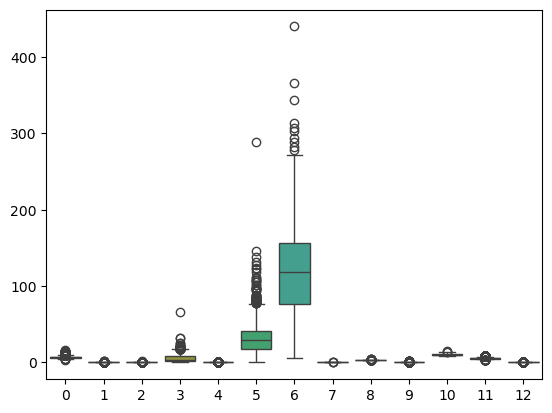

In [5]:
sns.boxplot(data)

<Axes: >

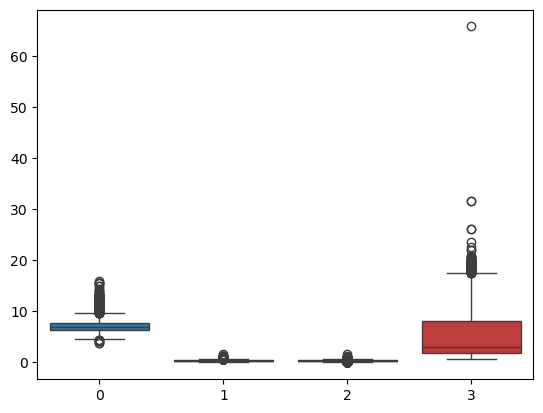

In [6]:
sns.boxplot(data.iloc[:,0:4])

# 이상값이 상당히 많음 

In [7]:
data[12].value_counts()

12
0    4898
1    1599
Name: count, dtype: int64

In [8]:
X = data.drop(12, axis=1)
y = data[12]

# 칼럼 12 가 target column

In [9]:
# 스케일링하기 

from sklearn.preprocessing import RobustScaler

In [10]:
rs = RobustScaler()
X_scaled = rs.fit_transform(X)
X_scaled 

array([[ 0.30769231,  2.41176471, -2.21428571, ...,  0.29411765,
        -0.5       , -1.        ],
       [ 0.61538462,  3.47058824, -2.21428571, ...,  1.        ,
        -0.27777778, -1.        ],
       [ 0.61538462,  2.76470588, -1.92857143, ...,  0.82352941,
        -0.27777778, -1.        ],
       ...,
       [-0.38461538, -0.29411765, -0.85714286, ..., -0.29411765,
        -0.5       ,  0.        ],
       [-1.15384615,  0.        , -0.07142857, ..., -0.76470588,
         1.38888889,  1.        ],
       [-0.76923077, -0.47058824,  0.5       , ..., -1.11764706,
         0.83333333,  0.        ]])

In [11]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [12]:
# 데이터셋을 홀드아웃으로 나눠서 분석하기 

from sklearn.model_selection import train_test_split

In [13]:
# 데이터 6000개이니 valid 로 하기 

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

# Sequential 로 해보기 (함수형/클래스형 아무거나 상관없음) 

In [14]:
# 1) Sequential

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report

2024-09-11 09:17:31.986088: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 09:17:34.572602: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-11 09:17:34.572753: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-11 09:17:34.577005: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-11 09:17:34.823003: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


In [15]:
X_train.shape

(3898, 12)

In [16]:
X_train.shape[1]

12

In [17]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))   # 입력층
model.add(Dense(16, activation='relu'))                 # 은닉층 1
model.add(Dense(8, activation='relu'))                  # 은닉층 2
model.add(Dense(1, activation='sigmoid'))               # 출력층, y가 이진법 (0,1) 이기 때문에 sigmoid
model.summary()

# y가 이진법 (0,1) 이기 때문에 sigmoid

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


2024-09-11 09:17:35.227765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 09:17:35.229734: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-11 09:17:35.312807: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:17:35.312853: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-11 09:17:35.312874: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 100, batch_size = 500, validation_data = (X_valid, y_valid)) 


# y가 이진법 (0,1) 이기 때문에 sigmoid
# 그래서 loss 부분도 binary_crossentropy

Epoch 1/100
7/8 [=========================>....] - ETA: 0s - loss: 0.7461 - accuracy: 0.3674

2024-09-11 09:17:36.027006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:17:36.097811: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:17:36.097869: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 1s 34ms/step - loss: 0.7399 - accuracy: 0.3807 - val_loss: 0.6716 - val_accuracy: 0.5158
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6356 - accuracy: 0.6473 - val_loss: 0.5859 - val_accuracy: 0.7837
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 0.5905 - accuracy: 0.8180

2024-09-11 09:17:36.356417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:17:36.381784: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:17:36.381843: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 0s 16ms/step - loss: 0.5607 - accuracy: 0.8633 - val_loss: 0.5227 - val_accuracy: 0.9315
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.5026 - accuracy: 0.9433 - val_loss: 0.4694 - val_accuracy: 0.9561
Epoch 5/100
8/8 [==============================] - 0s 14ms/step - loss: 0.4501 - accuracy: 0.9618 - val_loss: 0.4184 - val_accuracy: 0.9684
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 0.3987 - accuracy: 0.9684 - val_loss: 0.3675 - val_accuracy: 0.9715
Epoch 7/100
8/8 [==============================] - 0s 14ms/step - loss: 0.3474 - accuracy: 0.9736 - val_loss: 0.3165 - val_accuracy: 0.9808
Epoch 8/100
8/8 [==============================] - 0s 14ms/step - loss: 0.2968 - accuracy: 0.9764 - val_loss: 0.2673 - val_accuracy: 0.9838
Epoch 9/100
8/8 [==============================] - 0s 15ms/step - loss: 0.2490 - accuracy: 0.9805 - val_loss: 0.2220 - val_accuracy: 0.9846
Epoch 10/100
8/8 [==============

8/8 [==============================] - 0s 14ms/step - loss: 0.0195 - accuracy: 0.9969 - val_loss: 0.0133 - val_accuracy: 0.9969
Epoch 62/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0193 - accuracy: 0.9969 - val_loss: 0.0133 - val_accuracy: 0.9969
Epoch 63/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0191 - accuracy: 0.9969 - val_loss: 0.0131 - val_accuracy: 0.9969
Epoch 64/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0189 - accuracy: 0.9969 - val_loss: 0.0131 - val_accuracy: 0.9969
Epoch 65/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0188 - accuracy: 0.9969 - val_loss: 0.0129 - val_accuracy: 0.9969
Epoch 66/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0186 - accuracy: 0.9969 - val_loss: 0.0129 - val_accuracy: 0.9969
Epoch 67/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0184 - accuracy: 0.9969 - val_loss: 0.0127 - val_accuracy: 0.9969
Epoch 68/100
8/8 [========

In [19]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x > 0.5 else 0)
print(classification_report(y_test, pred))

41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       976
           1       0.99      0.98      0.99       324

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



2024-09-11 09:17:47.737413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:17:47.872005: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:17:47.872067: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-11 09:17:47.888118: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:17:47.888180: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

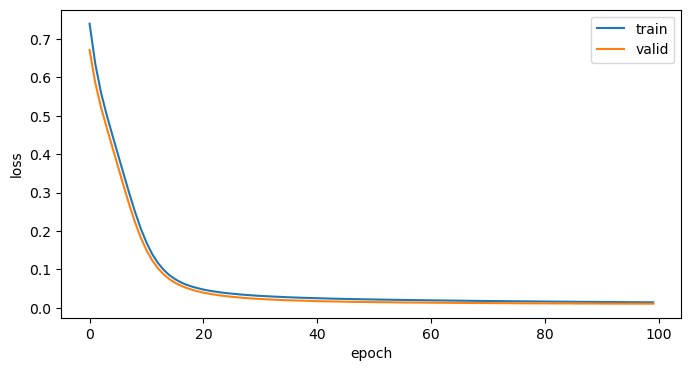

In [21]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'])
plt.show()

# EarlyStopping 으로 학습 조기 중단 및 저장하기 

* EarlyStopping : 성능 개선이 멈추면 학습을 조기에 중단하는 콜백 
* ModelCheckpoint : 학습 중 가장 성능이 좋은 모델을 자동으로 저장하는 콜백 

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=30)

# patience=30 이 부분의 수치를 바꾸면 새로 실행되고 파일에 저장됨
# patience=50 이렇게 바꿈

# ModelCheckpoint 
* 모델을 중간에 저장하는 옵션

In [24]:
import os
if not os.path.exists("./model"):
        os.makedirs("./model")
        print(f"Directory /model created.")
else:
        print(f"Directory /model already exists.")

Directory /model already exists.


In [25]:
modelpath = "./model/{epoch:03d}--{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [26]:
history = model.fit(X_train, y_train, epochs = 1000, batch_size = 500, validation_data = (X_valid, y_valid), 
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0143 - accuracy: 0.9972 - val_loss: 0.0108 - val_accuracy: 0.9962
Epoch 2/1000
8/8 [==============================] - 0s 22ms/step - loss: 0.0142 - accuracy: 0.9972 - val_loss: 0.0107 - val_accuracy: 0.9962
Epoch 3/1000
8/8 [==============================] - 0s 23ms/step - loss: 0.0141 - accuracy: 0.9972 - val_loss: 0.0106 - val_accuracy: 0.9962
Epoch 4/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0140 - accuracy: 0.9972 - val_loss: 0.0107 - val_accuracy: 0.9962
Epoch 5/1000
8/8 [==============================] - 0s 23ms/step - loss: 0.0139 - accuracy: 0.9972 - val_loss: 0.0106 - val_accuracy: 0.9962
Epoch 6/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0138 - accuracy: 0.9972 - val_loss: 0.0105 - val_accuracy: 0.9962
Epoch 7/1000
8/8 [==============================] - 0s 20ms/step - loss: 0.0137 - accuracy: 0.9972 - val_loss: 0.0106 - val_accuracy: 0.9962
Epoch 8/1000


Epoch 59/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0093 - val_accuracy: 0.9962
Epoch 60/1000
8/8 [==============================] - 0s 19ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0093 - val_accuracy: 0.9962
Epoch 61/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.0094 - accuracy: 0.9979 - val_loss: 0.0093 - val_accuracy: 0.9962
Epoch 62/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0093 - accuracy: 0.9979 - val_loss: 0.0094 - val_accuracy: 0.9962
Epoch 63/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.0092 - accuracy: 0.9979 - val_loss: 0.0094 - val_accuracy: 0.9962
Epoch 64/1000
8/8 [==============================] - 0s 21ms/step - loss: 0.0091 - accuracy: 0.9979 - val_loss: 0.0092 - val_accuracy: 0.9962
Epoch 65/1000
8/8 [==============================] - 0s 20ms/step - loss: 0.0090 - accuracy: 0.9979 - val_loss: 0.0091 - val_accuracy: 0.9969
Epoch 

8/8 [==============================] - 0s 14ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0097 - val_accuracy: 0.9962
Epoch 117/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0097 - val_accuracy: 0.9962
Epoch 118/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0094 - val_accuracy: 0.9962
Epoch 119/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0095 - val_accuracy: 0.9962
Epoch 120/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0097 - val_accuracy: 0.9962
Epoch 121/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0098 - val_accuracy: 0.9962
Epoch 122/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0095 - val_accuracy: 0.9962
Epoch 123/1000

# 저장된 베스트 모델을 불러와서 테스트 하기 

In [27]:
from tensorflow.keras.models import load_model

In [28]:
best_model = load_model("./model/001--0.0097.keras")

In [29]:
best_pred = best_model.predict(X_test)
best_pred = pd.DataFrame(best_pred)
best_pred = best_pred[0].apply(lambda x:1 if x > 0.5 else 0)
print(classification_report(y_test,best_pred))

41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       976
           1       0.99      0.99      0.99       324

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



2024-09-11 09:18:03.941462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


# ---------------------------------------------------------------------------------------------------

## 다른 데이터로 실행하기

In [30]:
wine = pd.read_csv("../07deep_learning/data/winequality-white.csv", sep = ";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
wine.info()

# 결측치없다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<Axes: >

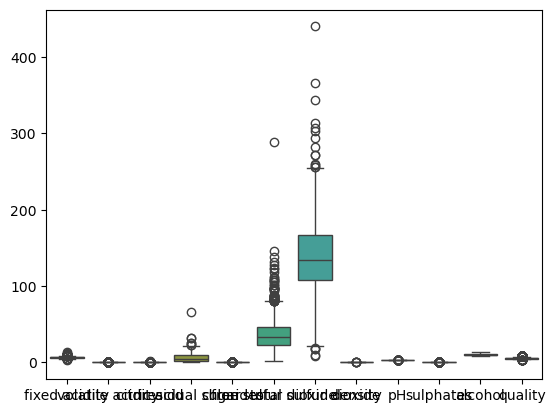

In [32]:
sns.boxplot(wine)

In [33]:
wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [34]:
X = wine.drop('quality', axis=1).copy()
y = wine['quality'].copy()
y2 = wine['quality'].copy()

# wine['quality'] 가 target column

In [35]:
# 스케일링하기 

from sklearn.preprocessing import RobustScaler


# 이상치가 많기 때문에 RobustScaler 로 사용한다. 

In [36]:
rs2 =  RobustScaler() # 중앙값과 IQR 을 사용한 스케일링

X_scaled = rs2.fit_transform(X)
X_scaled

# 중앙값을 기준으로 스케일링하고, 사분위 범위를 사용하여 이상치의 영향을 줄인다. 
# 이상치에 강한 스케일링 방법

array([[ 0.2       ,  0.09090909,  0.33333333, ..., -0.94736842,
        -0.14285714, -0.84210526],
       [-0.5       ,  0.36363636,  0.16666667, ...,  0.63157895,
         0.14285714, -0.47368421],
       [ 1.3       ,  0.18181818,  0.66666667, ...,  0.42105263,
        -0.21428571, -0.15789474],
       ...,
       [-0.3       , -0.18181818, -1.08333333, ..., -1.        ,
        -0.07142857, -0.52631579],
       [-1.3       ,  0.27272727, -0.16666667, ...,  0.84210526,
        -0.64285714,  1.26315789],
       [-0.8       , -0.45454545,  0.5       , ...,  0.42105263,
        -1.07142857,  0.73684211]])

* StandardScaler : 데이터가 정규분포를 따르는 경우 가장 적합
* MinMaxScaler : 피처 값이 다양한 범위에 분포되어 있고, 이상치가 많으면 적합함
* RobustScaler : 이상치가 많은 경우에 유리 

In [37]:
y = pd.get_dummies(y)
y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [38]:
# 데이터셋을 홀드아웃으로 나눠서 분석하기 

from sklearn.model_selection import train_test_split

In [39]:
# 데이터 4000개이니 valid 로 하기 

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

# Sequential 로 해보기

In [40]:
# 1) Sequential

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report

In [41]:
X_train.shape[1]

11

In [42]:
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))   # 입력층
model2.add(Dense(32, activation='relu'))                  # 은닉층 1
model2.add(Dense(64, activation='relu'))                  # 은닉층 2
model2.add(Dense(32, activation='relu'))                  # 은닉층 3
model2.add(Dense(16, activation='relu'))                  # 은닉층 4
model2.add(Dense(7, activation='softmax'))                # 출력층, 다중분류
# 클래스가 7개이기 때문에 7을 준다.
model2.summary()

# 다중분류

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                768       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 7)                 119       
                                                                 
Total params: 7,687
Trainable params: 7,687
Non-traina

In [43]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience = 100)
filepath = "./model/white_wine{epoch:04d}__{val_loss:.4f}.keras"
model_save = ModelCheckpoint(filepath = filepath, save_best_only=True)
history2 = model2.fit(X_train, y_train, epochs = 10000, batch_size = 500, validation_data = (X_valid, y_valid), callbacks = [early_stop, model_save]) 


Epoch 1/10000
6/6 [==============================] - ETA: 0s - loss: 1.8860 - accuracy: 0.0776

2024-09-11 09:18:05.099145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:18:05.156884: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:18:05.156941: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 1s 59ms/step - loss: 1.8860 - accuracy: 0.0776 - val_loss: 1.8249 - val_accuracy: 0.1755
Epoch 2/10000
6/6 [==============================] - ETA: 0s - loss: 1.7849 - accuracy: 0.2491

2024-09-11 09:18:05.367535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:18:05.395093: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:18:05.395152: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 0s 30ms/step - loss: 1.7849 - accuracy: 0.2491 - val_loss: 1.7357 - val_accuracy: 0.3704
Epoch 3/10000
6/6 [==============================] - 0s 28ms/step - loss: 1.6929 - accuracy: 0.4091 - val_loss: 1.6423 - val_accuracy: 0.4388
Epoch 4/10000
6/6 [==============================] - 0s 29ms/step - loss: 1.5923 - accuracy: 0.4483 - val_loss: 1.5370 - val_accuracy: 0.4510
Epoch 5/10000
6/6 [==============================] - 0s 30ms/step - loss: 1.4800 - accuracy: 0.4523 - val_loss: 1.4309 - val_accuracy: 0.4480
Epoch 6/10000
6/6 [==============================] - 0s 29ms/step - loss: 1.3849 - accuracy: 0.4558 - val_loss: 1.3600 - val_accuracy: 0.4592
Epoch 7/10000
6/6 [==============================] - 0s 27ms/step - loss: 1.3236 - accuracy: 0.4816 - val_loss: 1.3225 - val_accuracy: 0.5010
Epoch 8/10000
6/6 [==============================] - 0s 29ms/step - loss: 1.2848 - accuracy: 0.5048 - val_loss: 1.2885 - val_accuracy: 0.5010
Epoch 9/10000
6/6 [=

6/6 [==============================] - 0s 15ms/step - loss: 0.8794 - accuracy: 0.6317 - val_loss: 1.0387 - val_accuracy: 0.5500
Epoch 60/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.8757 - accuracy: 0.6334 - val_loss: 1.0435 - val_accuracy: 0.5500
Epoch 61/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.8711 - accuracy: 0.6361 - val_loss: 1.0392 - val_accuracy: 0.5510
Epoch 62/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.8675 - accuracy: 0.6399 - val_loss: 1.0384 - val_accuracy: 0.5490
Epoch 63/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.8637 - accuracy: 0.6372 - val_loss: 1.0504 - val_accuracy: 0.5571
Epoch 64/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.8621 - accuracy: 0.6457 - val_loss: 1.0445 - val_accuracy: 0.5520
Epoch 65/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.8585 - accuracy: 0.6440 - val_loss: 1.0427 - val_accuracy: 0.5582
Epoch 66/10000

6/6 [==============================] - 0s 15ms/step - loss: 0.6921 - accuracy: 0.7314 - val_loss: 1.1255 - val_accuracy: 0.5673
Epoch 117/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.6972 - accuracy: 0.7233 - val_loss: 1.1523 - val_accuracy: 0.5653
Epoch 118/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.6946 - accuracy: 0.7321 - val_loss: 1.1347 - val_accuracy: 0.5551
Epoch 119/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.6857 - accuracy: 0.7311 - val_loss: 1.1347 - val_accuracy: 0.5653
Epoch 120/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.6852 - accuracy: 0.7362 - val_loss: 1.1337 - val_accuracy: 0.5694
Epoch 121/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.6806 - accuracy: 0.7427 - val_loss: 1.1453 - val_accuracy: 0.5786
Epoch 122/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.6805 - accuracy: 0.7389 - val_loss: 1.1465 - val_accuracy: 0.5776
Epoch 12

In [44]:
wine_best_model = load_model("./model/white_wine0001__1.8904.keras")
wine_pred = wine_best_model.predict(X_test)
wine_pred = pd.DataFrame(wine_pred, columns = y_valid.columns)

31/31 [==============================] - 0s 3ms/step


2024-09-11 09:18:22.236692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:18:22.352846: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:18:22.352917: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


In [45]:
wine_pred 

,3,4,5,6,7,8,9
0,0.139927,0.142714,0.142892,0.147985,0.145178,0.143190,0.138113
1,0.140001,0.141627,0.147060,0.146107,0.144495,0.141354,0.139356
2,0.132888,0.137718,0.144653,0.146849,0.156503,0.145591,0.135797
3,0.130727,0.142734,0.138916,0.153043,0.157908,0.147233,0.129440
4,0.136807,0.141923,0.142586,0.150979,0.148929,0.144072,0.134705
...,...,...,...,...,...,...,...
975,0.127228,0.143253,0.158703,0.142769,0.150106,0.139710,0.138231
976,0.121102,0.131622,0.143368,0.150179,0.176346,0.149305,0.128077
977,0.130852,0.134992,0.153660,0.158598,0.145547,0.147337,0.129014
978,0.120754,0.146305,0.138285,0.153421,0.161909,0.153170,0.126156


In [46]:
y_test_class = y_test.idxmax(axis = 1)
y_test_class = y_test_class.reset_index(drop=True)
y_test_class

0      6
1      6
2      7
3      7
4      5
      ..
975    6
976    4
977    5
978    6
979    6
Length: 980, dtype: int64

In [47]:
wine_pred_class = wine_pred.idxmax(axis=1)
wine_pred_class 

0      6
1      5
2      7
3      7
4      6
      ..
975    5
976    7
977    6
978    7
979    5
Length: 980, dtype: int64

In [48]:
print(classification_report(y_test_class, wine_pred_class))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        33
           5       0.41      0.39      0.40       291
           6       0.42      0.22      0.29       440
           7       0.22      0.60      0.32       176
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.32       980
   macro avg       0.15      0.17      0.14       980
weighted avg       0.35      0.32      0.31       980



### XGB로 비교 분석
* Gradient Boosting 기반으로 함 
* 부스팅 기법은 여러 약한 모델을 순차적으로 학습하고, 이전 모델이 만든 오차를 줄이는 방식으로 새로운 모델을 추가함. 
* 즉, 각 새로운 모델은 이전 모델들이 예측하지 못한 부분을 더 잘 예측하려고 시도함.

In [49]:
#!pip install xgboost

In [50]:
y2

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()
y2_labeled = le.fit_transform(y2)
y2_labeled

array([3, 3, 3, ..., 3, 4, 3])

In [53]:
from xgboost import XGBClassifier

In [54]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_scaled, y2_labeled, test_size=0.4, stratify=y2_labeled, random_state=10)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_valid2, y_valid2, test_size=0.5, stratify=y_valid2, random_state=10)

## ADASYN
* Adaptive Synthetic Sampling Approach for Imbalanced Learning 
* 불균형 데이터 문제를 해결하기 위한 오버샘플링 기법 중 하나 
* 불균형 데이터 : 클래스 간 데이터 수가 크게 차이 나는 상황을 말함 
* ADASYN 은 소수 클래스의 데이터를 증가시켜 불균형 문제를 완화함  

In [56]:
# !pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)


In [57]:
from imblearn.over_sampling import ADASYN

In [58]:
adasyn = ADASYN(random_state=10, n_neighbors=2, n_jobs=-1)
X_train2_adasyn, y_train2_adasyn = adasyn.fit_resample(X_train2, y_train2)

In [59]:
X_train2_adasyn = pd.DataFrame(X_train2_adasyn, columns=X.columns)
X_train2_adasyn 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.400000,-0.181818,-1.166667,-0.353659,0.500000,-0.521739,0.186441,-0.381496,0.315789,-0.071429,-0.052632
1,0.300000,-0.727273,0.583333,1.134146,0.571429,0.608696,0.372881,1.308966,0.894737,2.214286,-0.684211
2,0.000000,-0.727273,-0.333333,0.560976,-0.285714,-0.217391,-0.355932,0.073101,-0.368421,-0.142857,0.263158
3,0.300000,-0.454545,0.416667,-0.341463,-1.214286,-0.478261,-0.576271,-0.785837,-0.157895,-0.642857,0.526316
4,-0.200000,0.000000,-0.916667,-0.280488,-1.214286,0.608696,-0.135593,-0.651057,0.210526,-0.642857,0.473684
...,...,...,...,...,...,...,...,...,...,...,...
9290,1.437013,-0.047538,0.702604,0.126134,-0.716468,-0.282941,-0.040431,-0.003261,0.319006,0.001091,0.561075
9291,1.727996,-0.000856,0.830979,0.305650,-0.667564,-0.275499,-0.083948,0.248944,0.246936,-0.023361,0.371891
9292,0.523141,-0.135237,0.610880,-0.383995,-0.838843,-0.259792,-0.028155,-0.743358,0.647672,-0.038370,1.159199
9293,0.487635,-0.113718,0.739095,-0.381109,-0.830389,-0.239209,-0.080310,-0.750117,0.703734,-0.089093,1.184116


In [60]:
y_train2_adasyn = pd.Series(y_train2_adasyn)
y_train2_adasyn.value_counts()

2    1410
1    1346
5    1345
0    1320
3    1318
6    1317
4    1239
Name: count, dtype: int64

In [61]:
xgb = XGBClassifier(max_depth= 5, n_estimators=1000, random_state=10, n_jobs=-1)
xgb.fit(X_train2_adasyn, y_train2_adasyn)
xgb_pred = xgb.predict(X_valid2)
print(classification_report(le.inverse_transform(y_valid2), le.inverse_transform(xgb_pred)))

              precision    recall  f1-score   support

           3       0.14      0.25      0.18         4
           4       0.46      0.39      0.43        33
           5       0.66      0.62      0.64       291
           6       0.64      0.64      0.64       440
           7       0.55      0.61      0.58       176
           8       0.43      0.46      0.44        35
           9       0.00      0.00      0.00         1

    accuracy                           0.61       980
   macro avg       0.41      0.42      0.41       980
weighted avg       0.61      0.61      0.61       980



In [62]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [63]:
X = wine.drop('quality', axis=1).copy()
y = wine['quality'].copy()
y2 = wine['quality'].copy()

In [64]:
y = pd.get_dummies(y)

In [65]:
from sklearn.preprocessing import RobustScaler

In [66]:
rs = RobustScaler()
X_scaled = rs.fit_transform(X)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y ,random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [69]:
X_train.dtype

dtype('float64')

In [70]:
print(X_train.shape, X_valid.shape, X_test.shape)

(2938, 11) (980, 11) (980, 11)


In [72]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report

In [73]:
model1 = Sequential()
model1.add(Dense(64, input_dim=11, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(7, activation='softmax'))

In [74]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                768       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 7)                 119       
                                                                 
Total params: 7,687
Trainable params: 7,687
Non-traina

In [75]:
print(X_train.shape, y_train.shape)

(2938, 11) (2938, 7)


In [76]:
model1.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=1000)
modelpath = "./model/wine_model{epoch:0003d}__{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
history = model1.fit(X_train, y_train, epochs=10000, batch_size=500, validation_data=(X_valid, y_valid), callbacks=[early_stop, checkpointer])

Epoch 1/10000
1/6 [====>.........................] - ETA: 2s - loss: 1.9222 - accuracy: 0.2640

2024-09-11 09:20:46.122816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:20:46.178883: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:20:46.178939: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 1s 51ms/step - loss: 1.8785 - accuracy: 0.2937 - val_loss: 1.8251 - val_accuracy: 0.3000
Epoch 2/10000
6/6 [==============================] - ETA: 0s - loss: 1.7760 - accuracy: 0.2995

2024-09-11 09:20:46.348548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:20:46.377726: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:20:46.377795: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 0s 29ms/step - loss: 1.7760 - accuracy: 0.2995 - val_loss: 1.7137 - val_accuracy: 0.2980
Epoch 3/10000
6/6 [==============================] - 0s 28ms/step - loss: 1.6570 - accuracy: 0.2975 - val_loss: 1.5914 - val_accuracy: 0.2980
Epoch 4/10000
6/6 [==============================] - 0s 31ms/step - loss: 1.5294 - accuracy: 0.2975 - val_loss: 1.4634 - val_accuracy: 0.3000
Epoch 5/10000
6/6 [==============================] - 0s 28ms/step - loss: 1.4057 - accuracy: 0.3199 - val_loss: 1.3623 - val_accuracy: 0.4082
Epoch 6/10000
6/6 [==============================] - 0s 30ms/step - loss: 1.3319 - accuracy: 0.4666 - val_loss: 1.3199 - val_accuracy: 0.4704
Epoch 7/10000
6/6 [==============================] - 0s 26ms/step - loss: 1.3037 - accuracy: 0.4605 - val_loss: 1.2953 - val_accuracy: 0.4653
Epoch 8/10000
6/6 [==============================] - 0s 29ms/step - loss: 1.2654 - accuracy: 0.4850 - val_loss: 1.2692 - val_accuracy: 0.4898
Epoch 9/10000
6/6 [=

6/6 [==============================] - 0s 14ms/step - loss: 0.9048 - accuracy: 0.6174 - val_loss: 1.0468 - val_accuracy: 0.5469
Epoch 60/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.9010 - accuracy: 0.6184 - val_loss: 1.0446 - val_accuracy: 0.5520
Epoch 61/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.8978 - accuracy: 0.6157 - val_loss: 1.0524 - val_accuracy: 0.5510
Epoch 62/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.8910 - accuracy: 0.6201 - val_loss: 1.0455 - val_accuracy: 0.5480
Epoch 63/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.8924 - accuracy: 0.6178 - val_loss: 1.0516 - val_accuracy: 0.5531
Epoch 64/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.8871 - accuracy: 0.6232 - val_loss: 1.0537 - val_accuracy: 0.5592
Epoch 65/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.8819 - accuracy: 0.6270 - val_loss: 1.0503 - val_accuracy: 0.5561
Epoch 66/10000

6/6 [==============================] - 0s 17ms/step - loss: 0.7102 - accuracy: 0.7141 - val_loss: 1.1398 - val_accuracy: 0.5765
Epoch 117/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.7124 - accuracy: 0.7185 - val_loss: 1.1497 - val_accuracy: 0.5694
Epoch 118/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.7021 - accuracy: 0.7246 - val_loss: 1.1260 - val_accuracy: 0.5827
Epoch 119/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.6994 - accuracy: 0.7270 - val_loss: 1.1502 - val_accuracy: 0.5653
Epoch 120/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.6949 - accuracy: 0.7257 - val_loss: 1.1376 - val_accuracy: 0.5796
Epoch 121/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.6942 - accuracy: 0.7263 - val_loss: 1.1913 - val_accuracy: 0.5765
Epoch 122/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.6921 - accuracy: 0.7233 - val_loss: 1.1376 - val_accuracy: 0.5745
Epoch 12

6/6 [==============================] - 0s 15ms/step - loss: 0.5489 - accuracy: 0.7954 - val_loss: 1.3324 - val_accuracy: 0.5786
Epoch 174/10000
6/6 [==============================] - 0s 14ms/step - loss: 0.5477 - accuracy: 0.7897 - val_loss: 1.3277 - val_accuracy: 0.5827
Epoch 175/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.5462 - accuracy: 0.7934 - val_loss: 1.3610 - val_accuracy: 0.5755
Epoch 176/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.5418 - accuracy: 0.7948 - val_loss: 1.3747 - val_accuracy: 0.5776
Epoch 177/10000
6/6 [==============================] - 0s 14ms/step - loss: 0.5435 - accuracy: 0.7948 - val_loss: 1.3489 - val_accuracy: 0.5776
Epoch 178/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.5386 - accuracy: 0.7948 - val_loss: 1.3338 - val_accuracy: 0.5837
Epoch 179/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.5353 - accuracy: 0.8012 - val_loss: 1.4001 - val_accuracy: 0.5776
Epoch 18

6/6 [==============================] - 0s 17ms/step - loss: 0.4392 - accuracy: 0.8295 - val_loss: 1.5719 - val_accuracy: 0.5888
Epoch 231/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.4369 - accuracy: 0.8393 - val_loss: 1.6267 - val_accuracy: 0.5704
Epoch 232/10000
6/6 [==============================] - 0s 19ms/step - loss: 0.4350 - accuracy: 0.8410 - val_loss: 1.5893 - val_accuracy: 0.5867
Epoch 233/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.4257 - accuracy: 0.8424 - val_loss: 1.5769 - val_accuracy: 0.5888
Epoch 234/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.4292 - accuracy: 0.8373 - val_loss: 1.5921 - val_accuracy: 0.5816
Epoch 235/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.4284 - accuracy: 0.8414 - val_loss: 1.6180 - val_accuracy: 0.5867
Epoch 236/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.4210 - accuracy: 0.8482 - val_loss: 1.6234 - val_accuracy: 0.5796
Epoch 23

6/6 [==============================] - 0s 17ms/step - loss: 0.3386 - accuracy: 0.8795 - val_loss: 1.9384 - val_accuracy: 0.5714
Epoch 288/10000
6/6 [==============================] - 0s 14ms/step - loss: 0.3365 - accuracy: 0.8819 - val_loss: 1.9115 - val_accuracy: 0.5735
Epoch 289/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.3409 - accuracy: 0.8795 - val_loss: 1.8967 - val_accuracy: 0.5765
Epoch 290/10000
6/6 [==============================] - 0s 19ms/step - loss: 0.3341 - accuracy: 0.8863 - val_loss: 1.9492 - val_accuracy: 0.5776
Epoch 291/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.3368 - accuracy: 0.8819 - val_loss: 1.9993 - val_accuracy: 0.5816
Epoch 292/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.3466 - accuracy: 0.8741 - val_loss: 2.0572 - val_accuracy: 0.5827
Epoch 293/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.3559 - accuracy: 0.8696 - val_loss: 1.9840 - val_accuracy: 0.5704
Epoch 29

6/6 [==============================] - 0s 17ms/step - loss: 0.2576 - accuracy: 0.9159 - val_loss: 2.3246 - val_accuracy: 0.5745
Epoch 345/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.2583 - accuracy: 0.9159 - val_loss: 2.3239 - val_accuracy: 0.5776
Epoch 346/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.2650 - accuracy: 0.9095 - val_loss: 2.3784 - val_accuracy: 0.5776
Epoch 347/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.2581 - accuracy: 0.9142 - val_loss: 2.3296 - val_accuracy: 0.5684
Epoch 348/10000
6/6 [==============================] - 0s 14ms/step - loss: 0.2593 - accuracy: 0.9132 - val_loss: 2.3485 - val_accuracy: 0.5755
Epoch 349/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.2670 - accuracy: 0.9112 - val_loss: 2.4593 - val_accuracy: 0.5694
Epoch 350/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.2850 - accuracy: 0.8941 - val_loss: 2.3334 - val_accuracy: 0.5724
Epoch 35

6/6 [==============================] - 0s 15ms/step - loss: 0.2023 - accuracy: 0.9353 - val_loss: 2.8188 - val_accuracy: 0.5714
Epoch 402/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1960 - accuracy: 0.9425 - val_loss: 2.8090 - val_accuracy: 0.5786
Epoch 403/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.1958 - accuracy: 0.9404 - val_loss: 2.8114 - val_accuracy: 0.5673
Epoch 404/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.1943 - accuracy: 0.9435 - val_loss: 2.8009 - val_accuracy: 0.5816
Epoch 405/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1953 - accuracy: 0.9415 - val_loss: 2.8910 - val_accuracy: 0.5694
Epoch 406/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1981 - accuracy: 0.9370 - val_loss: 2.9024 - val_accuracy: 0.5786
Epoch 407/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1932 - accuracy: 0.9408 - val_loss: 2.8446 - val_accuracy: 0.5633
Epoch 40

6/6 [==============================] - 0s 18ms/step - loss: 0.1556 - accuracy: 0.9537 - val_loss: 3.3112 - val_accuracy: 0.5735
Epoch 459/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.1521 - accuracy: 0.9558 - val_loss: 3.2876 - val_accuracy: 0.5684
Epoch 460/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.1501 - accuracy: 0.9575 - val_loss: 3.3791 - val_accuracy: 0.5745
Epoch 461/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1539 - accuracy: 0.9568 - val_loss: 3.2959 - val_accuracy: 0.5684
Epoch 462/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1529 - accuracy: 0.9554 - val_loss: 3.3036 - val_accuracy: 0.5786
Epoch 463/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1520 - accuracy: 0.9585 - val_loss: 3.3417 - val_accuracy: 0.5755
Epoch 464/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1509 - accuracy: 0.9558 - val_loss: 3.3265 - val_accuracy: 0.5735
Epoch 46

6/6 [==============================] - 0s 16ms/step - loss: 0.1185 - accuracy: 0.9673 - val_loss: 3.7864 - val_accuracy: 0.5724
Epoch 516/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1147 - accuracy: 0.9670 - val_loss: 3.7911 - val_accuracy: 0.5724
Epoch 517/10000
6/6 [==============================] - 0s 14ms/step - loss: 0.1148 - accuracy: 0.9666 - val_loss: 3.7660 - val_accuracy: 0.5735
Epoch 518/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.1152 - accuracy: 0.9704 - val_loss: 3.7913 - val_accuracy: 0.5755
Epoch 519/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.1136 - accuracy: 0.9687 - val_loss: 3.8116 - val_accuracy: 0.5776
Epoch 520/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1113 - accuracy: 0.9707 - val_loss: 3.8223 - val_accuracy: 0.5694
Epoch 521/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1130 - accuracy: 0.9694 - val_loss: 3.8581 - val_accuracy: 0.5684
Epoch 52

6/6 [==============================] - 0s 16ms/step - loss: 0.0910 - accuracy: 0.9779 - val_loss: 4.2200 - val_accuracy: 0.5704
Epoch 573/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.0894 - accuracy: 0.9769 - val_loss: 4.2837 - val_accuracy: 0.5673
Epoch 574/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0875 - accuracy: 0.9779 - val_loss: 4.4576 - val_accuracy: 0.5694
Epoch 575/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.0893 - accuracy: 0.9786 - val_loss: 4.4464 - val_accuracy: 0.5714
Epoch 576/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.0932 - accuracy: 0.9745 - val_loss: 4.2631 - val_accuracy: 0.5755
Epoch 577/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.0921 - accuracy: 0.9769 - val_loss: 4.2487 - val_accuracy: 0.5684
Epoch 578/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.0923 - accuracy: 0.9752 - val_loss: 4.2339 - val_accuracy: 0.5684
Epoch 57

6/6 [==============================] - 0s 16ms/step - loss: 0.0977 - accuracy: 0.9738 - val_loss: 4.8895 - val_accuracy: 0.5582
Epoch 630/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1257 - accuracy: 0.9609 - val_loss: 4.6140 - val_accuracy: 0.5480
Epoch 631/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1593 - accuracy: 0.9455 - val_loss: 5.2674 - val_accuracy: 0.5612
Epoch 632/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1895 - accuracy: 0.9398 - val_loss: 4.9671 - val_accuracy: 0.5694
Epoch 633/10000
6/6 [==============================] - 0s 14ms/step - loss: 0.1349 - accuracy: 0.9513 - val_loss: 4.7850 - val_accuracy: 0.5653
Epoch 634/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.1038 - accuracy: 0.9721 - val_loss: 4.8750 - val_accuracy: 0.5714
Epoch 635/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0989 - accuracy: 0.9721 - val_loss: 4.7370 - val_accuracy: 0.5704
Epoch 63

6/6 [==============================] - 0s 15ms/step - loss: 0.0643 - accuracy: 0.9843 - val_loss: 5.1250 - val_accuracy: 0.5745
Epoch 687/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.0671 - accuracy: 0.9840 - val_loss: 5.4251 - val_accuracy: 0.5673
Epoch 688/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0665 - accuracy: 0.9837 - val_loss: 5.2874 - val_accuracy: 0.5724
Epoch 689/10000
6/6 [==============================] - 0s 14ms/step - loss: 0.0611 - accuracy: 0.9850 - val_loss: 5.3598 - val_accuracy: 0.5714
Epoch 690/10000
6/6 [==============================] - 0s 14ms/step - loss: 0.0627 - accuracy: 0.9854 - val_loss: 5.2018 - val_accuracy: 0.5755
Epoch 691/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0606 - accuracy: 0.9860 - val_loss: 5.2423 - val_accuracy: 0.5663
Epoch 692/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0577 - accuracy: 0.9867 - val_loss: 5.2174 - val_accuracy: 0.5714
Epoch 69

6/6 [==============================] - 0s 15ms/step - loss: 0.0420 - accuracy: 0.9898 - val_loss: 5.8073 - val_accuracy: 0.5786
Epoch 744/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0421 - accuracy: 0.9901 - val_loss: 5.6597 - val_accuracy: 0.5796
Epoch 745/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0411 - accuracy: 0.9918 - val_loss: 5.6677 - val_accuracy: 0.5765
Epoch 746/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.0431 - accuracy: 0.9908 - val_loss: 5.7201 - val_accuracy: 0.5786
Epoch 747/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.0409 - accuracy: 0.9898 - val_loss: 5.7748 - val_accuracy: 0.5745
Epoch 748/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0427 - accuracy: 0.9918 - val_loss: 5.7586 - val_accuracy: 0.5796
Epoch 749/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.0420 - accuracy: 0.9905 - val_loss: 5.7865 - val_accuracy: 0.5755
Epoch 75

6/6 [==============================] - 0s 18ms/step - loss: 0.0371 - accuracy: 0.9929 - val_loss: 5.8211 - val_accuracy: 0.5735
Epoch 801/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.0373 - accuracy: 0.9918 - val_loss: 5.8684 - val_accuracy: 0.5786
Epoch 802/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0356 - accuracy: 0.9939 - val_loss: 5.9276 - val_accuracy: 0.5735
Epoch 803/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0346 - accuracy: 0.9929 - val_loss: 5.9145 - val_accuracy: 0.5765
Epoch 804/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0346 - accuracy: 0.9925 - val_loss: 5.8918 - val_accuracy: 0.5765
Epoch 805/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0341 - accuracy: 0.9925 - val_loss: 5.8804 - val_accuracy: 0.5765
Epoch 806/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0334 - accuracy: 0.9939 - val_loss: 5.9958 - val_accuracy: 0.5724
Epoch 80

6/6 [==============================] - 0s 15ms/step - loss: 0.0279 - accuracy: 0.9963 - val_loss: 6.2229 - val_accuracy: 0.5735
Epoch 858/10000
6/6 [==============================] - 0s 14ms/step - loss: 0.0290 - accuracy: 0.9949 - val_loss: 6.4984 - val_accuracy: 0.5776
Epoch 859/10000
6/6 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.9932 - val_loss: 6.1711 - val_accuracy: 0.5755
Epoch 860/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0323 - accuracy: 0.9935 - val_loss: 6.1085 - val_accuracy: 0.5765
Epoch 861/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0336 - accuracy: 0.9929 - val_loss: 6.2112 - val_accuracy: 0.5765
Epoch 862/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0324 - accuracy: 0.9932 - val_loss: 6.3639 - val_accuracy: 0.5776
Epoch 863/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0302 - accuracy: 0.9952 - val_loss: 6.3200 - val_accuracy: 0.5796
Epoch 86

6/6 [==============================] - 0s 15ms/step - loss: 0.0299 - accuracy: 0.9942 - val_loss: 6.5171 - val_accuracy: 0.5786
Epoch 915/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0313 - accuracy: 0.9942 - val_loss: 6.7623 - val_accuracy: 0.5847
Epoch 916/10000
6/6 [==============================] - 0s 19ms/step - loss: 0.0278 - accuracy: 0.9956 - val_loss: 6.5870 - val_accuracy: 0.5735
Epoch 917/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.0252 - accuracy: 0.9949 - val_loss: 6.6595 - val_accuracy: 0.5694
Epoch 918/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.0228 - accuracy: 0.9969 - val_loss: 6.5679 - val_accuracy: 0.5735
Epoch 919/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0246 - accuracy: 0.9956 - val_loss: 6.6340 - val_accuracy: 0.5714
Epoch 920/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0266 - accuracy: 0.9959 - val_loss: 6.4881 - val_accuracy: 0.5765
Epoch 92

6/6 [==============================] - 0s 15ms/step - loss: 0.0238 - accuracy: 0.9956 - val_loss: 6.6691 - val_accuracy: 0.5765
Epoch 972/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0262 - accuracy: 0.9952 - val_loss: 6.8383 - val_accuracy: 0.5735
Epoch 973/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.0237 - accuracy: 0.9959 - val_loss: 6.9853 - val_accuracy: 0.5684
Epoch 974/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.0211 - accuracy: 0.9963 - val_loss: 7.0408 - val_accuracy: 0.5776
Epoch 975/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0228 - accuracy: 0.9963 - val_loss: 6.8443 - val_accuracy: 0.5776
Epoch 976/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0209 - accuracy: 0.9973 - val_loss: 6.8876 - val_accuracy: 0.5714
Epoch 977/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0212 - accuracy: 0.9976 - val_loss: 6.9884 - val_accuracy: 0.5765
Epoch 97

Epoch 1028/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.0208 - accuracy: 0.9969 - val_loss: 6.8530 - val_accuracy: 0.5806
Epoch 1029/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0206 - accuracy: 0.9969 - val_loss: 6.9319 - val_accuracy: 0.5806
Epoch 1030/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.0189 - accuracy: 0.9976 - val_loss: 6.8470 - val_accuracy: 0.5735
Epoch 1031/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.0184 - accuracy: 0.9973 - val_loss: 6.8972 - val_accuracy: 0.5816
Epoch 1032/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.0186 - accuracy: 0.9973 - val_loss: 6.9193 - val_accuracy: 0.5755
Epoch 1033/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.0177 - accuracy: 0.9980 - val_loss: 6.8654 - val_accuracy: 0.5796
Epoch 1034/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.0172 - accuracy: 0.9983 - val_loss: 6.9346 - val_ac

In [77]:
wine_best_model = load_model("./model/wine_model001__1.8251.keras")
pred = wine_best_model.predict(X_test)
pred = pd.DataFrame(pred)
pred

31/31 [==============================] - 0s 3ms/step


2024-09-11 09:22:42.017344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,0,1,2,3,4,5,6
0,0.129142,0.132144,0.161516,0.150304,0.152587,0.137539,0.136768
1,0.137943,0.120878,0.175255,0.146764,0.142461,0.137926,0.138773
2,0.122653,0.103567,0.202644,0.150664,0.130997,0.159185,0.130291
3,0.124327,0.120584,0.175543,0.145644,0.141875,0.149688,0.142339
4,0.139661,0.111734,0.190197,0.146279,0.142211,0.135647,0.134270
...,...,...,...,...,...,...,...
975,0.078802,0.055556,0.327815,0.125396,0.104094,0.172843,0.135495
976,0.111061,0.119064,0.173196,0.164721,0.161006,0.146776,0.124175
977,0.128445,0.117547,0.165738,0.155297,0.146666,0.145050,0.141257
978,0.102826,0.085074,0.220749,0.147508,0.131990,0.162144,0.149708


In [78]:
# 각 행에서 확률이 가장 높은 클래스의 인덱스를 찾기
predicted_classes = pred.idxmax(axis=1)

# 결과 출력
print(predicted_classes)

0      2
1      2
2      2
3      2
4      2
      ..
975    2
976    2
977    2
978    2
979    2
Length: 980, dtype: int64


In [79]:
# 각 행에서 확률이 가장 높은 클래스의 인덱스를 찾기
y_classes = y_test.idxmax(axis=1)

# 결과 출력
print(y_classes)

1815    6
4590    6
452     7
3761    7
3899    5
       ..
1731    6
4609    4
460     5
301     6
2708    6
Length: 980, dtype: int64


In [80]:
y_test

,3,4,5,6,7,8,9
1815,False,False,False,True,False,False,False
4590,False,False,False,True,False,False,False
452,False,False,False,False,True,False,False
3761,False,False,False,False,True,False,False
3899,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
1731,False,False,False,True,False,False,False
4609,False,True,False,False,False,False,False
460,False,False,True,False,False,False,False
301,False,False,False,True,False,False,False


In [81]:
print(classification_report(y_classes, predicted_classes))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       4.0
           4       0.00      0.00      0.00      33.0
           5       0.00      0.00      0.00     291.0
           6       0.00      0.00      0.00     440.0
           7       0.00      0.00      0.00     176.0
           8       0.00      0.00      0.00      35.0
           9       0.00      0.00      0.00       1.0

    accuracy                           0.00     980.0
   macro avg       0.00      0.00      0.00     980.0
weighted avg       0.00      0.00      0.00     980.0



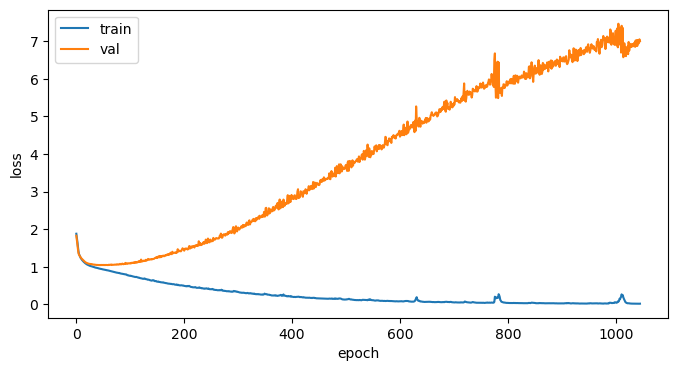

In [82]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
le = LabelEncoder()
y_labeled = le.fit_transform(y2)
y_labeled

array([3, 3, 3, ..., 3, 4, 3])

In [85]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_scaled, y_labeled, test_size=0.4, stratify=y_labeled ,random_state=10)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_valid2, y_valid2, test_size=0.5, stratify=y_valid2, random_state=10)

In [86]:
from xgboost import XGBClassifier

In [87]:
xgb = XGBClassifier(max_depth=5, n_estimators=1000, n_jobs=-1, random_state=10)
xgb.fit(X_train2, y_train2)
xgb_pred = xgb.predict(X_valid2)
print(classification_report(le.inverse_transform(y_test2), le.inverse_transform(xgb_pred)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        32
           5       0.32      0.30      0.31       292
           6       0.47      0.51      0.49       440
           7       0.21      0.21      0.21       176
           8       0.10      0.06      0.07        35
           9       0.00      0.00      0.00         1

    accuracy                           0.36       980
   macro avg       0.16      0.16      0.16       980
weighted avg       0.35      0.36      0.35       980

